In [1]:
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

from itertools import combinations

In [2]:
df=pd.read_csv('world_data_sin_nulos.csv', index_col=0)

1. Calcula las siguientes estadísticas descriptivas para las variables numéricas:
- Media
- Mediana
- Desviación estándar
- Mínimo
- Máximo

In [3]:
numericas = df.select_dtypes(include=['int64','float64']).columns
numericas

Index(['density', 'agriculturalland', 'landarea', 'birthrate', 'callingcode',
       'co2-emissions', 'fertilityrate', 'forestedarea', 'gdp',
       'grossprimaryeducationenrollment', 'infantmortality', 'lifeexpectancy',
       'outofpockethealthexpenditure', 'physiciansperthousand', 'population',
       'urban_population', 'latitude', 'longitude', 'armedforcessize', 'cpi',
       'cpichange', 'gasolineprice', 'grosstertiaryeducationenrollment',
       'maternalmortalityratio', 'minimumwage',
       'populationlaborforceparticipation', 'taxrevenue', 'totaltaxrate',
       'unemploymentrate'],
      dtype='object')

In [6]:
for numerica in numericas: 
    media=df[numerica].mean()
    mediana=df[numerica].median()
    desviacion=df[numerica].std()
    minimo=df[numerica].min()
    maximo=df[numerica].max()
    print(f'La columna {numerica} tiene los siguientes valores: media= {media}, mediana= {mediana}, desviación estándar= {desviacion}, mínimo= {minimo}, máximo= {maximo}')
    print('-----------------------------------------------------------------------')

La columna density tiene los siguientes valores: media= 356.7641025641026, mediana= 89.0, desviación estándar= 1982.8889669887628, mínimo= 2.0, máximo= 26337.0
-----------------------------------------------------------------------
La columna agriculturalland tiene los siguientes valores: media= 39.134871794871806, mediana= 39.6, desviación estándar= 21.386637468890402, mínimo= 0.6, máximo= 82.6
-----------------------------------------------------------------------
La columna landarea tiene los siguientes valores: media= 686700.7076923077, mediana= 119511.0, desviación estándar= 1917085.0052104185, mínimo= 0.0, máximo= 17098240.0
-----------------------------------------------------------------------
La columna birthrate tiene los siguientes valores: media= 20.145282051282045, mediana= 17.95, desviación estándar= 9.79861542383212, mínimo= 5.9, máximo= 46.08
-----------------------------------------------------------------------
La columna callingcode tiene los siguientes valores: medi

2. Identifica el país con la mayor densidad de población y el país con la menor población en el conjunto de datos.

In [17]:
condicion=df['density'].max()
resultado=df[df['density']==condicion]['country']
resultado


113    Monaco
Name: country, dtype: object

In [18]:
condicion2=df['population'].min()
resultado2=df[df['population']==condicion2]['country']
resultado2

73    Vatican City
Name: country, dtype: object

3. Calcula la tasa promedio de natalidad (birth_rate) para todos los países en el conjunto de datos.

In [19]:
df['birthrate'].mean()

20.145282051282045

4. Realiza un análisis de la mortalidad infantil (infant_mortality) y clasifica los países en tres categorías: baja, moderada y alta mortalidad infantil.

In [28]:
def mortalidad(numero):
   
    if numero <10:
        return "Baja"
    
    elif numero >= 10 and numero <= 50:
        return "Moderada"
    
    else:
        return "Alta"

In [29]:
df["infantmortality"].apply(mortalidad)

0      Moderada
1          Baja
2      Moderada
3          Baja
4          Alta
         ...   
190    Moderada
191    Moderada
192    Moderada
193    Moderada
194    Moderada
Name: infantmortality, Length: 195, dtype: object

In [30]:
df["infantmortality_cat"] = df["infantmortality"].apply(mortalidad)
df['infantmortality_cat'].value_counts()

Moderada    101
Baja         73
Alta         21
Name: infantmortality_cat, dtype: int64

5. Calcula la correlación entre las variables de "fertility_rate" y "life_expectancy". Interpreta la relación entre estas dos variables. ¿Qué tipo de correlación hay? Explica la razón de esta relación

In [34]:
df_punto5=df[['fertilityrate', 'lifeexpectancy']]
df_punto5.head(3)

,fertilityrate,lifeexpectancy
0,4.47,64.5
1,1.62,78.5
2,3.02,76.7


In [38]:
df_correlaciones=df_punto5.corr( method='spearman')
df_correlaciones

,fertilityrate,lifeexpectancy
fertilityrate,1.00000,-0.83538
lifeexpectancy,-0.83538,1.00000


Correlación fuertemente negativa, de modo que a mayor tasa de fertilidad menor esperanza de vida. 

6. Visualiza la distribución de la variable "cpi" utilizando un histograma y comenta sobre la distribución.

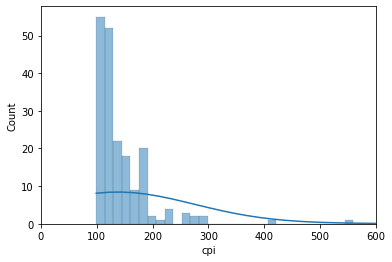

In [46]:
sns.histplot(x='cpi', data=df, kde=True)
plt.xlim(0,600);

In [44]:
df['cpi'].mean()

186.14367577067125

In [45]:
df['cpi'].median()

125.08

Podemos apreciar que los datos están sesgados debido a la presencia de outliers. La mayor concentración de paises se encuentra entre el cpi 100 y 200. 

7. Encuentra el país con la mayor diferencia entre el "gdp" (Producto Interno Bruto) y el "co2-emissions" (emisiones de dióxido de carbono).